# Manipulating Satellite Imagery

This notebook demonstrates the workflow to create the training and test datasets. Each dataset shall be saved in a specific folder that includes both imagery and masks. After the images are downloaded, the anotation files will be merged into a dictionary and then one mask is generated for each annotation file (`vgg json` format).

## Requirements

Import external packages and dependencies.

In [11]:
import glob
import json
import numpy as np
import os
from preprocessing.waterMask import WaterMask
from datasets.sentinelTileService import SentinelTileService
from datasets.resic45 import Resic45
%matplotlib inline

The list of constants necessary for this notebook.

In [12]:
flag_download_dataset = 1
training_dataset_file_id = '14kkcuU6wd9UMvjaDrg3PNI-e_voCi8HL'
training_dataset_file_name = 'NWPU_images.zip'
water_bodies_file_name = 'datasets/waterBodies.json'
training_annotations_filter = os.path.join('annotations', 'nwpu', '*.json')
test_annotations_filter = os.path.join('annotations', 's2cloudless', '*.json')

## Download training and test images

The training dataset can be found as a compressed file in Google Drive.

In [13]:
if flag_download_dataset:
    resic45 = Resic45()
    resic45.download_file_from_google_drive(training_dataset_file_id, training_dataset_file_name)
    resic45.extract_and_clean_up(training_dataset_file_name)

downloading NWPU_images.zip... Done.
uncompressing NWPU_images.zip... Done.
house cleaning... Done.


The training dataset is based on the Resic45 dataset provided by Northwest University in China . A list of water bodies of interest can be found in a JSON file that includes proprieties such as name, country, layers, minimum latitude, maximum latitude, mininum longitude, and maximum longitude. The last four properties refers to the bonding box that is required by the map service.

The [OpenStreetMap](https://www.openstreetmap.org/) website can be used to retrieve the bounding box for each water body.

In [14]:
if flag_download_dataset:
    water_bodies = json.load(open(water_bodies_file_name))
    for _, lake_properties in water_bodies.items():
        sentinel_service = SentinelTileService(**lake_properties)
        sentinel_service.download_all_layers()

downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2019.jpg... Done.
downloading s2cloudless_imagery/data/bolivia_poopo_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/bolivia_poopo_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/bolivia_poopo_s2cloudless_2019.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2019.jpg... Done.
downloading s2cloudless_imagery/data/united_states_mojave_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/d

downloading s2cloudless_imagery/data/poland_gardzko_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/poland_gardzko_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/poland_jezioro_sulinowski_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/poland_jezioro_sulinowski_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/poland_jezioro_sulinowski_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/indonesia_danau_laut_tawar_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/indonesia_danau_laut_tawar_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/france_lac_de_mansigne_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/france_lac_de_mansigne_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/france_lac_de_mansigne_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/philipines_lake_dapao_s2cloudless_2016.jpg... Done.
downloadin

downloading s2cloudless_imagery/data/sweden_pilkkarijarvi_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/finland_kelonetekemaejarvi_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/finland_kelonetekemaejarvi_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/finland_kelonetekemaejarvi_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/finland_uljuan_tekojarvi_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/finland_uljuan_tekojarvi_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/finland_uljuan_tekojarvi_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/estland_veisjaerv_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/estland_veisjaerv_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/estland_veisjaerv_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/estland_nuudsaku_jarv_s2cloudless_2016.jpg... Done.
downloadin

downloading s2cloudless_imagery/data/germany_gremminer_see_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/germany_gremminer_see_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/denmark_tingstade_trask_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/denmark_tingstade_trask_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/denmark_tingstade_trask_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/denmark_sunds_so_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/denmark_sunds_so_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/denmark_sunds_so_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/denmark_hau_trask_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/denmark_hau_trask_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/denmark_hau_trask_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/denma

downloading s2cloudless_imagery/data/austria_zoggler_stausee_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/austria_zoggler_stausee_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/austria_zoggler_stausee_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/austria_zoggler_stausee_s2cloudless_2019.jpg... Done.
downloading s2cloudless_imagery/data/austria_lago_del_careser_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/austria_lago_del_careser_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/austria_lago_del_careser_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/italy_lago_di_cancano_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/italy_lago_di_cancano_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/italy_lago_di_cancano_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/italy_lago_di_cancano_s2cloudless_2019.jpg... Done.
down

## Training dataset

Read all annotations files and consolidate them into a merged dicitionary.

In [15]:
labels = {}
training_annotations = glob.glob(training_annotations_filter)
for file_name in training_annotations:
    file = json.load(open(file_name))
    labels.update(file)

Read the merged dictionary and create a list based on its key that contains the image file name.

In [16]:
images = sorted(labels.keys())
assert len(images) == 690

Generate all masks for the training dataset. The `WaterMask` class is responsible to read the image and the merged dictionary containing the annotations and then it generates the mask.

The class constructor requires only one parameter that is the directory where the images are saved on the disk. Then, the `create_mask` method is called passing the annotation dictionary and the image name. This process is repeated as part of a loop and one mask is generated for every image of the *images* list.

In [17]:
water_mask = WaterMask('nwpu_images')
for i in range(len(images)):
    water_mask.create_mask(labels, images[i])

/anaconda3/envs/deep-water/lib/python3.8/site-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Choose a random image from the training dataset.

In [18]:
image_id = np.random.randint(0, len(images))
randon_image = images[image_id]

A randon image along with its annotations is displayed in the picture below.

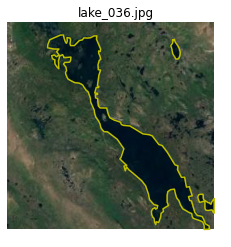

In [19]:
water_mask.display_image_with_annotations(randon_image, labels, 'y')

Finally, the corresponding water segmentation mask is displayed for validation.

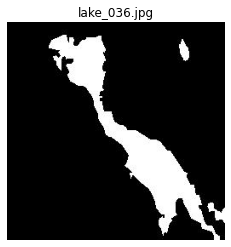

In [20]:
water_mask.display_mask(randon_image)

## Test dataset

Read all annotations files and consolidate them into a merged dicitionary.

In [21]:
labels = {}
test_annotations = glob.glob(test_annotations_filter)
for file_name in test_annotations:
    file = json.load(open(file_name))
    labels.update(file)

Read the merged dictionary and create a list based on its key that contains the image file name.

In [22]:
images = sorted(labels.keys())
assert len(images) == 182

Generate all masks for the test dataset based on the Sentinel-2 map service. The `WaterMask` class is responsible to read the image and the merged dictionary containing the annotations and then it generates the mask.

The class constructor requires only one parameter that is the directory where the images are saved on the disk. Then, the `create_mask` method is called passing the annotation dictionary and the image name. This process is repeated as part of a loop and one mask is generated for every image of the *images* list.

In [23]:
water_mask = WaterMask('s2cloudless_imagery')
for i in range(len(images)):
    water_mask.create_mask(labels, images[i])

Choose a random image from the test dataset.

In [33]:
image_id = np.random.randint(0, len(images))
randon_image = images[image_id]

A randon image along with its annotations is displayed in the picture below.

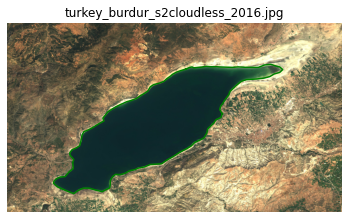

In [34]:
water_mask.display_image_with_annotations(randon_image, labels, 'g')

Finally, the corresponding water segmentation mask is displayed for validation.

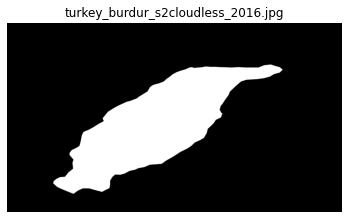

In [35]:
water_mask.display_mask(randon_image)